# The aim of this project is to develop a predictive classification model that accurately identifies the ancestory of an individual given some genetic features

# importing necessary libraries :

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# EXPLORATORY DATA ANALYSIS(EDA)

# creating a dataframe from the given csv file

In [2]:
dataset=pd.read_csv('genetic_data_train.csv')
dataset

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry
0,-10.901171,0.798743,-1.143301,-1.070960,11.856396,-2.265965,4.536405,1.519959,-2.214294,-0.671274,African
1,-9.990054,1.416821,-0.729626,-0.443621,10.418594,0.443514,2.640659,-4.637746,3.351629,-0.671274,African
2,-9.345388,2.913054,-0.921421,0.029173,10.672615,-2.052552,5.140476,-1.451096,0.444183,-0.671274,African
3,-11.221507,1.733021,-2.339817,0.045786,13.195087,-3.068897,2.863434,-2.259194,2.374566,-0.671274,African
4,-10.175158,2.066307,-0.785493,-0.632400,7.461272,-1.643509,0.715258,-3.982752,0.098681,-0.671274,African
...,...,...,...,...,...,...,...,...,...,...,...
178,4.562678,1.595991,-6.255160,-3.083079,0.155693,-2.509439,-1.186470,0.641546,2.893239,0.885596,NativeAmerican
179,4.559052,1.581629,-5.121037,-4.312312,0.021703,-0.787173,-1.838054,-0.118590,1.200644,0.885596,NativeAmerican
180,3.101335,1.477101,-5.759153,-2.083745,-0.750615,1.061579,-1.341655,-0.215556,-0.133415,0.885596,NativeAmerican
181,3.235086,-0.974829,-4.049595,0.020907,-0.489322,0.627622,0.087942,0.737715,3.262126,0.885596,NativeAmerican


# finding unique values of Ancestory

In [3]:
dataset['Ancestry'].unique()

array(['African', 'European', 'EastAsian', 'Oceanian', 'NativeAmerican'],
      dtype=object)

# getting basic information about the dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       183 non-null    float64
 1   PC2       183 non-null    float64
 2   PC3       183 non-null    float64
 3   PC4       183 non-null    float64
 4   PC5       183 non-null    float64
 5   PC6       183 non-null    float64
 6   PC7       183 non-null    float64
 7   PC8       183 non-null    float64
 8   PC9       183 non-null    float64
 9   PC10      183 non-null    float64
 10  Ancestry  183 non-null    object 
dtypes: float64(10), object(1)
memory usage: 15.9+ KB


# checking if there are any null values in the dataset

In [5]:
dataset.isnull().values.any()

False

# PREDICTIVE DATA ANALYSIS

# specifying x and y for the model

In [6]:
X=dataset[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']]
Y=dataset[['Ancestry']]

# dividing the dataset into training and testing data

In [7]:
XTRAIN,XTEST,YTRAIN,YTEST=train_test_split(X,Y,test_size=0.1,random_state=10)

# 1) developing a logistic regression model

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(XTRAIN,YTRAIN)

LogisticRegression()

# predicting ancestory and testing accuracy of the model

In [9]:
model.predict(XTEST)
model.score(XTEST,YTEST)

1.0

# predicting ancestory by explicitly providing features

In [10]:
model.predict([[4.677763172,2.37837445,-5.635052385,-4.045866007,-0.376640117,-1.611639921,1.563821128,2.094956173,-0.149211889,0.885596323
]])

array(['NativeAmerican'], dtype=object)

# Data visualisation

# drawing confusion matrix for visualisation

In [11]:
y_predicted=model.predict(XTEST)
cm=confusion_matrix(YTEST,y_predicted)
cm

array([[4, 0, 0, 0, 0],
       [0, 9, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 2]], dtype=int64)

# using seaborn library for better visualisation

Text(33.22222222222222, 0.5, 'TRUE')

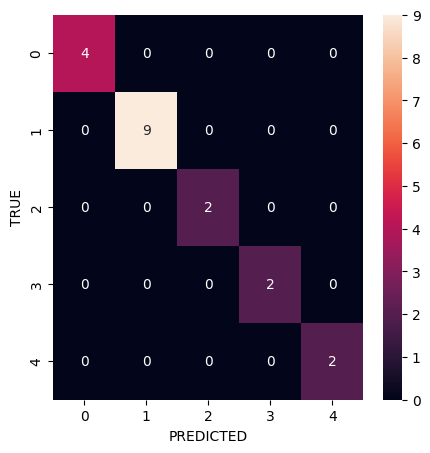

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

# as the model's score is pretty good and as can be inferred from the visualisation too it can be used to predict ancestory of an individual

# using the logistic regression model to predict ancestory for a set of individuals

In [13]:
dataset_test=pd.read_csv('genetic_data_test.csv')
dataset_X_Test=dataset_test[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']].loc[0:4]

In [14]:
model.predict(dataset_X_Test)

array(['Oceanian', 'NativeAmerican', 'European', 'African', 'EastAsian'],
      dtype=object)

# 

# 2) developing a decision tree classifier 

In [15]:
from sklearn.tree import DecisionTreeClassifier
#XTRAIN,XTEST,YTRAIN,YTEST
tree_model=DecisionTreeClassifier()
tree_model.fit(XTRAIN,YTRAIN)

DecisionTreeClassifier()

In [16]:
tree_model.score(XTEST,YTEST)

1.0

In [17]:
tree_model.predict(dataset_X_Test)

array(['Oceanian', 'NativeAmerican', 'European', 'African', 'EastAsian'],
      dtype=object)

# drawing confusion matrix for visualisation

In [18]:
y_tree_predicted=model.predict(XTEST)
cm_tree=confusion_matrix(YTEST,y_tree_predicted)
cm_tree

array([[4, 0, 0, 0, 0],
       [0, 9, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 2]], dtype=int64)

# using seaborn library for better visualisation

Text(33.22222222222222, 0.5, 'TRUE Value')

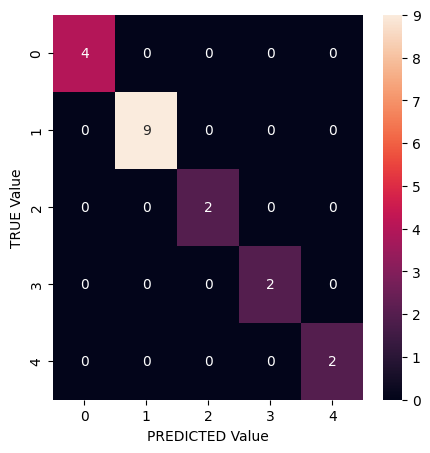

In [19]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel('PREDICTED Value')
plt.ylabel('TRUE Value')

# the decision tree algorithm also works quite well for this dataset

# 

# 3) developing SVM model 

In [20]:
from sklearn.svm import SVC
svmmodel=SVC()
svmmodel.fit(XTRAIN,YTRAIN)

SVC()

In [21]:
svmmodel.score(XTEST,YTEST)

1.0

In [22]:
svmmodel.predict(dataset_X_Test)

array(['Oceanian', 'NativeAmerican', 'European', 'African', 'EastAsian'],
      dtype=object)

In [23]:
y_svm_predicted=svmmodel.predict(XTEST)
cm_svm=confusion_matrix(YTEST,y_svm_predicted)
cm_svm

array([[4, 0, 0, 0, 0],
       [0, 9, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 2]], dtype=int64)

Text(33.22222222222222, 0.5, 'TRUE Value')

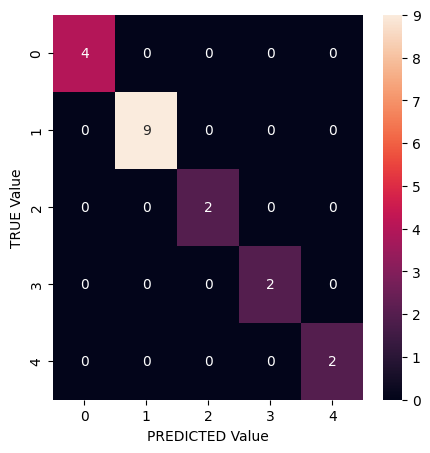

In [24]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_svm,annot=True)
plt.xlabel('PREDICTED Value')
plt.ylabel('TRUE Value')

# 

# 4) developing Random Forest Classifier model

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfmodel=RandomForestClassifier()
rfmodel.fit(XTRAIN,YTRAIN)

RandomForestClassifier()

In [27]:
rfmodel.score(XTEST,YTEST)

1.0

In [28]:
rfmodel.predict(dataset_X_Test)

array(['Oceanian', 'NativeAmerican', 'European', 'African', 'EastAsian'],
      dtype=object)

In [29]:
y_rf_predicted=rfmodel.predict(XTEST)
cm_rf=confusion_matrix(YTEST,y_rf_predicted)
cm_rf

array([[4, 0, 0, 0, 0],
       [0, 9, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 2]], dtype=int64)

Text(33.22222222222222, 0.5, 'TRUE Value')

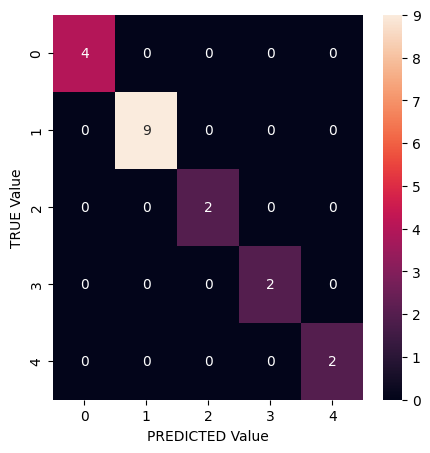

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_rf,annot=True)
plt.xlabel('PREDICTED Value')
plt.ylabel('TRUE Value')

# 

# 5) developing Naive Bayes Classifier model

In [33]:
from sklearn.naive_bayes import GaussianNB
gnbmodel=GaussianNB()
gnbmodel.fit(XTRAIN,YTRAIN)

GaussianNB()

In [34]:
gnbmodel.score(XTEST,YTEST)

1.0

In [35]:
gnbmodel.predict(dataset_X_Test)

array(['Oceanian', 'NativeAmerican', 'European', 'African', 'EastAsian'],
      dtype='<U14')

In [38]:
y_nb_predicted=gnbmodel.predict(XTEST)
cm_gnb=confusion_matrix(YTEST,y_nb_predicted)
cm_gnb

array([[4, 0, 0, 0, 0],
       [0, 9, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 2]], dtype=int64)

Text(33.22222222222222, 0.5, 'TRUE Value')

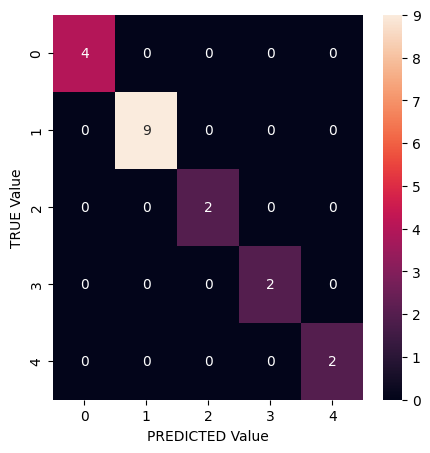

In [39]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_gnb,annot=True)
plt.xlabel('PREDICTED Value')
plt.ylabel('TRUE Value')

# 

# 6) developing K Nearest Neighbors Classifier model

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(XTRAIN,YTRAIN)

KNeighborsClassifier(n_neighbors=3)

In [55]:
knn_model.score(XTEST,YTEST)

1.0

In [57]:
knn_model.predict(dataset_X_Test)

array(['Oceanian', 'NativeAmerican', 'European', 'African', 'EastAsian'],
      dtype=object)

In [58]:
y_knn_predicted=knn_model.predict(XTEST)
cm_knn=confusion_matrix(YTEST,y_knn_predicted)
cm_knn

array([[4, 0, 0, 0, 0],
       [0, 9, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 2]], dtype=int64)

Text(33.22222222222222, 0.5, 'TRUE Value')

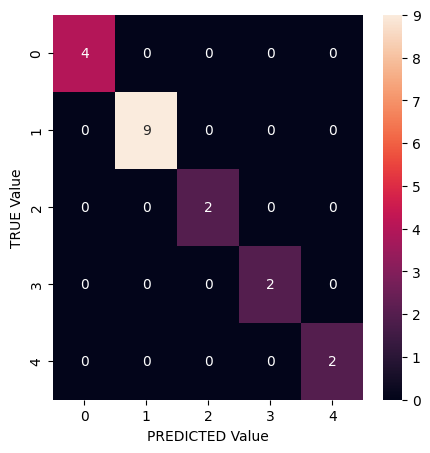

In [59]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_gnb,annot=True)
plt.xlabel('PREDICTED Value')
plt.ylabel('TRUE Value')

# 

# K Fold Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score
m1=LogisticRegression()
cross_val_score(m1,X,Y)

array([1., 1., 1., 1., 1.])

In [85]:
m1.fit(X,Y)

LogisticRegression()

In [86]:
m1.predict(dataset_X_Test)

array(['Oceanian', 'NativeAmerican', 'European', 'African', 'EastAsian'],
      dtype=object)

In [87]:
m2=DecisionTreeClassifier()
cross_val_score(m2,X,Y)

array([1.        , 1.        , 0.91891892, 0.97222222, 0.88888889])

In [88]:
m2.fit(X,Y)

DecisionTreeClassifier()

In [89]:
m2.predict(dataset_X_Test)

array(['Oceanian', 'NativeAmerican', 'European', 'African', 'EastAsian'],
      dtype=object)

In [90]:
m3=SVC()
cross_val_score(m3,X,Y)

array([1., 1., 1., 1., 1.])

In [92]:
m3.fit(X,Y)

SVC()

In [93]:
m3.predict(dataset_X_Test)

array(['Oceanian', 'NativeAmerican', 'European', 'African', 'EastAsian'],
      dtype=object)

In [95]:
m4=RandomForestClassifier()
cross_val_score(m4,X,Y)

array([1., 1., 1., 1., 1.])

In [96]:
m4.fit(X,Y)

RandomForestClassifier()

In [97]:
m4.predict(dataset_X_Test)

array(['Oceanian', 'NativeAmerican', 'European', 'African', 'EastAsian'],
      dtype=object)

In [99]:
m5=GaussianNB()
cross_val_score(m5,X,Y)

array([1., 1., 1., 1., 1.])

In [100]:
m5.fit(X,Y)

GaussianNB()

In [101]:
m5.predict(dataset_X_Test)

array(['Oceanian', 'NativeAmerican', 'European', 'African', 'EastAsian'],
      dtype='<U14')

In [126]:
m6=KNeighborsClassifier(n_neighbors=90)
cross_val_score(m6,X,Y)

array([0.32432432, 0.35135135, 0.32432432, 0.33333333, 0.33333333])

In [127]:
m6.fit(X,Y)

KNeighborsClassifier(n_neighbors=90)

In [128]:
m6.predict(dataset_X_Test)

array(['EastAsian', 'EastAsian', 'EastAsian', 'EastAsian', 'EastAsian'],
      dtype=object)

# 

# Stroring the logistic regression model in a pickle file

In [129]:
import pickle
with open('genetic_ancestry_classification.pickle','wb') as f:
    pickle.dump(model,f)

In [131]:
model=pickle.load(open('genetic_ancestry_classification.pickle','rb'))
print(model.predict([[-10.175138,2.0788567,-0.785293,-0.532400,7.461172,-1.643209,0.714258,-3.182752,0.198681,-0.571274]]))

['African']
